# Curso de redes 2020-1

## 1. Matemáticas de las redes
### 1.1 Representación matemática
Una red es una colección de nodos (vértices) conectados por medio de enlaces (aristas).

Se denotará (como en Newman) con $n$ al número de nodos y $m$ al número de enlaces.

En un primer momento, reduciremos nuestro análisis al de redes "simples", en las que no se permite más de un enlace entre cada par de nodos, y en el que no se permiten los enlaces de un nodo consigo mismo.

En python, una paquetería para hacer análisis de redes es NetworkX.

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

A continuación las funciones elementales para crear una red $G$ y agregarle nodos y enlaces.

In [3]:
G = nx.Graph() #crear gráfica G
G.add_node('Nodo 1') #agrega nodos de uno en uno
lista_nodos = ['Nodo 2', 'Nodo 3', 'Nodo 4', 'Nodo 5']
G.add_nodes_from(lista_nodos) #agrega nodos desde una lista de nodos

In [4]:
G.nodes

NodeView(('Nodo 1', 'Nodo 2', 'Nodo 3', 'Nodo 4', 'Nodo 5'))

In [5]:
G.edges

EdgeView([])

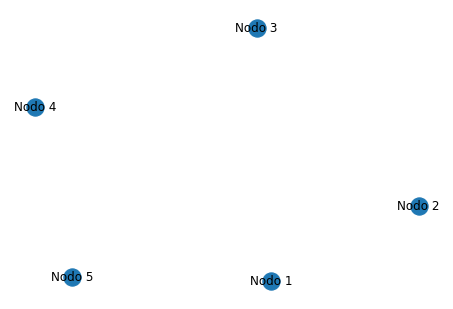

In [6]:
nx.draw(G, with_labels = True) #dibujar la red, un algoritmo elige las posiciones

In [7]:
G.add_edge('Nodo 1', 'Nodo 4') #agrega enlaces de uno en uno

dos_enlaces = [('Nodo 3', 'Nodo 4'),
               ('Nodo 1', 'Nodo 3')]

G.add_edges_from(dos_enlaces) #agrega enlaces desde una lista

In [8]:
G.edges()

EdgeView([('Nodo 1', 'Nodo 4'), ('Nodo 1', 'Nodo 3'), ('Nodo 3', 'Nodo 4')])

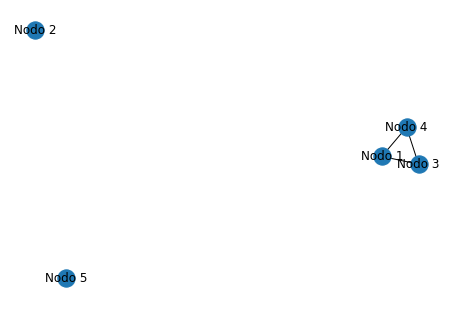

In [9]:
nx.draw(G, with_labels = True)

In [10]:
subconjunto = ['Nodo 1', 'Nodo 3', 'Nodo 4', 'Nodo 5']

lista_enlaces = [['Nodo 2', nodo] for nodo in subconjunto]

G.add_edges_from(lista_enlaces)

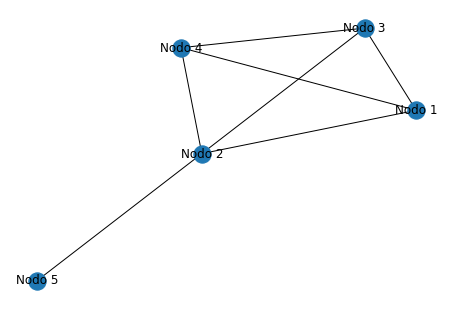

In [11]:
nx.draw(G, with_labels = True)

In [12]:
#H = nx.path_graph(10)
#G.add_nodes_from(H)
#G.nodes

### 1.2 Matriz de adyacencia
Mediante las matrices de numpy se pueden generar redes en NetworkX.

In [13]:
M = np.array([[0,1,0,0,1,0],
              [1,0,1,0,1,1],
              [0,1,0,1,0,0],
              [0,0,1,0,0,1],
              [1,1,0,0,0,1],
              [0,1,0,1,1,0]])
G2 = nx.from_numpy_matrix(M)

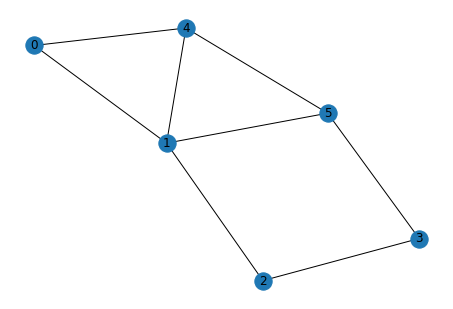

In [14]:
nx.draw(G2, with_labels = True)

In [15]:
M.dot(M).dot(M) #nos da el número de caminos de longitud 3

array([[2, 6, 1, 3, 5, 2],
       [6, 4, 6, 1, 6, 8],
       [1, 6, 0, 4, 3, 1],
       [3, 1, 4, 0, 2, 5],
       [5, 6, 3, 2, 4, 6],
       [2, 8, 1, 5, 6, 2]])

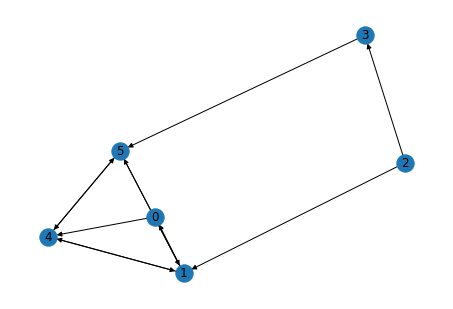

In [16]:
M3 = np.array([[0,0,0,0,1,0],
              [1,0,0,0,1,1],
              [0,1,0,1,0,0],
              [0,0,0,0,0,1],
              [0,1,0,0,0,1],
              [0,1,0,0,1,0]])
G3 = nx.DiGraph(M3)
nx.draw(G3, with_labels = True)

### 1.3 Caminos, conectividad y componentes

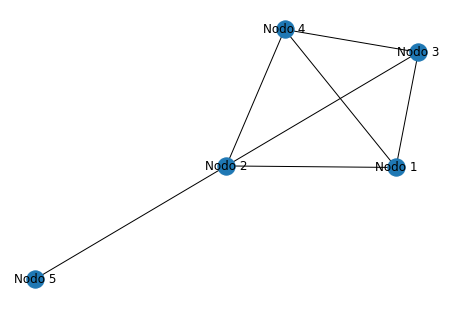

In [17]:
nx.draw(G, with_labels = True)

In [18]:
for camino in nx.algorithms.all_simple_paths(G,'Nodo 1', 'Nodo 5'):
    print(camino)

['Nodo 1', 'Nodo 4', 'Nodo 3', 'Nodo 2', 'Nodo 5']
['Nodo 1', 'Nodo 4', 'Nodo 2', 'Nodo 5']
['Nodo 1', 'Nodo 3', 'Nodo 4', 'Nodo 2', 'Nodo 5']
['Nodo 1', 'Nodo 3', 'Nodo 2', 'Nodo 5']
['Nodo 1', 'Nodo 2', 'Nodo 5']


In [19]:
nx.is_connected(G)

True

In [20]:
nx.number_connected_components(G)

1

In [21]:
#HACER EL ISCONNECTED DE THINKING COMPLEXITY

## 2. Medidas y métricas
### 2.1 Medidas de centralidad de los nodos

Las medidas de centralidad nos dan información de qué tan importante es cada uno de los nodos en la red. La 'importancia' puede ser entendida de varias formas y a cada una le corresponde una medida de centralidad.

Para estudiar las primeras medidas de centralidad, analizaremos un caso en el que un nodo es importante en muchos sentidos. Se trata la Red estrella

[[0 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]]


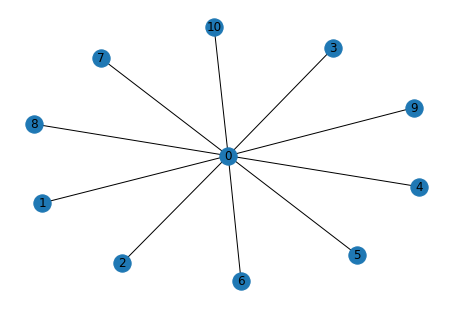

In [22]:
# generando la matriz de adyacencia de n nodos 
def MatrizEstrella(n):
    fila0 = [1 for i in range(n)]
    fila = [0 for i in range(n)]
    fila0[0] = 0
    fila[0] = 1
    arreglo = [fila for i in range(n)]
    arreglo[0] = fila0
    return np.array(arreglo)
print(MatrizEstrella(11))
# convirtiendo la matriz de adyacencia en red
G = nx.from_numpy_matrix(MatrizEstrella(11))
#G.edges(data=True)
nx.draw(G, with_labels = True)
plt.show()

In [23]:
from networkx.drawing.nx_pydot import write_dot

In [24]:
pos = nx.kamada_kawai_layout(G)

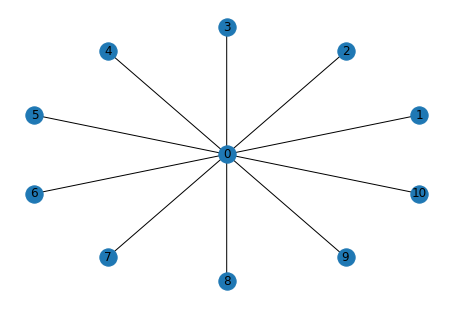

In [25]:
nx.draw(G, pos, with_labels = True)

#### Centralidad de grado
Una primera propiedad que da cuenta de la importancia de un nodo es el grado en sí mismo. Es decir, un nodo es importante mientras esté conectado con otros nodos. De este modo, para la red estrella, el nodo con mayor centralidad es el que se encuentra al centro todos los demás tienen una centralidad menor.
$$C_D (p_i) = \sum_{j=1}^N A_{ij}$$
Para que la centralidad de un nodo no dependa del tamaño de la red, puede normalizarse dividiendo el grado entre $N-1$, el máximo valor posible para el grado de un nodo.
$$C_D' (p_i) = \frac{1}{N-1} \sum_{j=1}^N A_{ij}$$
Con el siguiente código se muestra la centralidad de grado de cada nodo en la red estrella, tanto la normal como la normalizada:

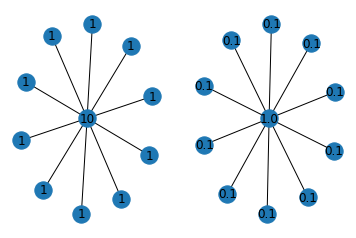

In [26]:
#plt.plot(figsize= (10,20))
plt.subplot(1,2,1)
nx.draw(G, labels = dict(G.degree()), with_labels = True)

plt.subplot(1,2,2)
nx.draw(G, labels = nx.degree_centrality(G), with_labels = True)
plt.show()

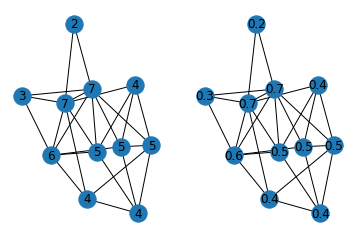

In [27]:
#plt.plot(figsize= (10,20))
A = nx.gnp_random_graph(11, .4)
plt.subplot(1,2,1)

pos = nx.kamada_kawai_layout(A)

nx.draw(A,pos = pos, labels = dict(A.degree()), with_labels = True)

deg =nx.degree_centrality(A)
for i in deg:
    deg[i] = round(deg[i],3)

plt.subplot(1,2,2)


nx.draw(A, pos = pos, labels = deg, with_labels = True)
plt.show()

#### Centralidad de intermediación (betweeness centrality)
Si se denota como $g_{ij}(k)$ al número de geodésicas entre los nodos $i$ y $j$ que pasan por el nodo $k$, y $g_{ij}$ al número total de geodésicas entre los nodos $i$ y $j$, se define la centralidad de intermediación como
$$C_B(k) = \sum_{i<j}^Nb_{ij}$$

In [72]:
# generando la matriz de adyacencia de n nodos 
def DobleEstrella(n):
    fila0 = [1 for i in range(n)]
    fila = [0 for i in range(n)]
    zeros = [0 for i in range(n)]
    fila0[0] = 0
    fila[0] = 1
    arreglo1 = [fila+zeros for i in range(n)]
    arreglo1[0] = fila0+zeros
    arreglo2 = [zeros+fila for i in range(n)]
    arreglo2[0] =  zeros + fila0
    return np.array(arreglo1 + arreglo2)
# convirtiendo la matriz de adyacencia en red
n = 50
matriz = DobleEstrella(n)
print(matriz)


[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


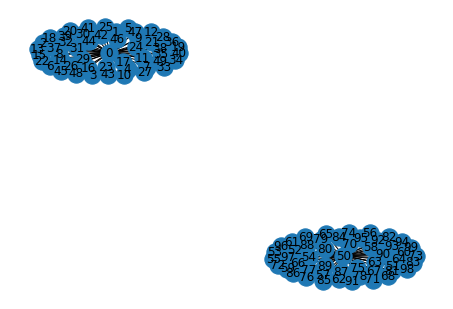

In [81]:
G = nx.from_numpy_matrix(matriz)
#G.edges(data=True)
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True)

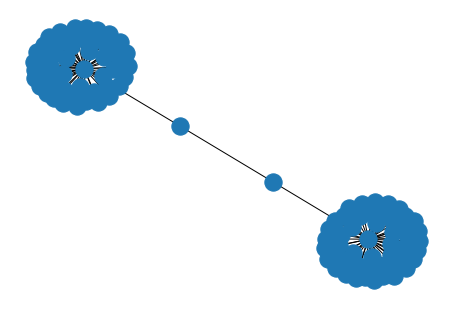

In [82]:
G.add_edge(40,60)
nx.draw(G)

[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]


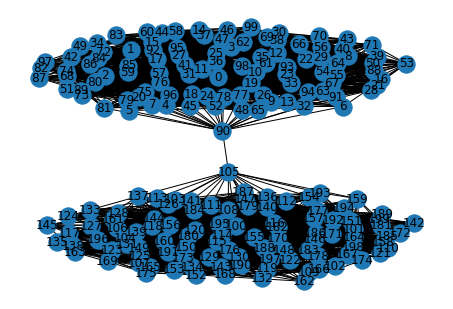

In [61]:
for j in range(10):
    for i in range(n):
        a = np.random.choice(list(range(n)))
        b = np.random.choice(list(range(n)))
        matriz[a,b] = 1
        matriz[b,a] = 1
    for i in range(n):
        a = np.random.choice(list(range(n,2*n)))
        b = np.random.choice(list(range(n,2*n)))
        matriz[a,b] = 1
        matriz[b,a] = 1
    matriz[n-10,n+5] = 1
    matriz[n+5, n-10] = 1

print(matriz)


G = nx.from_numpy_matrix(matriz)
#G.edges(data=True)
pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos, with_labels = True)

In [62]:
centralidad = nx.betweenness_centrality(G)
for i in centralidad:
    centralidad[i] = round(centralidad[i],3)

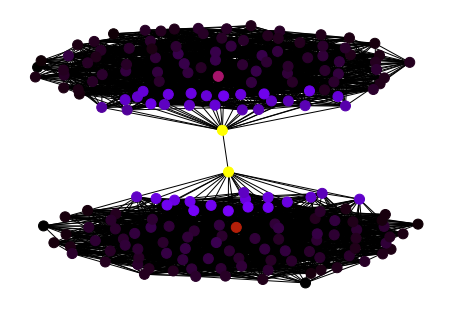

In [64]:
nx.draw(G,pos, labels = centralidad, node_color = np.array(list(nx.betweenness_centrality(G).values()))**.5, cmap = 'gnuplot', with_labels = False, node_size = 100)
plt.savefig('betweenness.png')

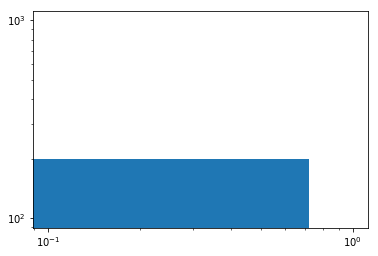

In [32]:
plt.hist(centralidad.values(), bins = 'fd')
plt.xscale('log')
plt.yscale('log')
plt.show()

Grafica como clase de python

In [33]:
G = nx.Graph()

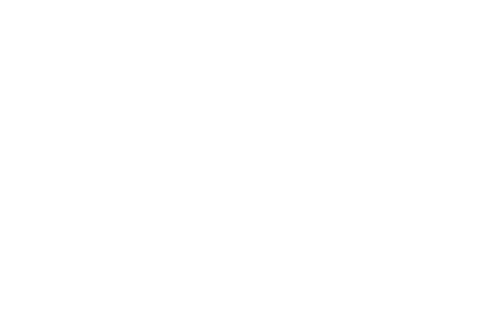

In [34]:
nx.draw(G)

In [35]:
# G, por ser una gráfica, tiene una serie de atributos. A sus atributos accedemos mediante la siguiente estructura:
G.nodes
G.edges

EdgeView([])

In [36]:
# G, por ser una clase de python, tiene algunas funciones de las que puede ser objeto. La estructura es la misma, pero con paréntesis:
G.add_node('Nodo 1')

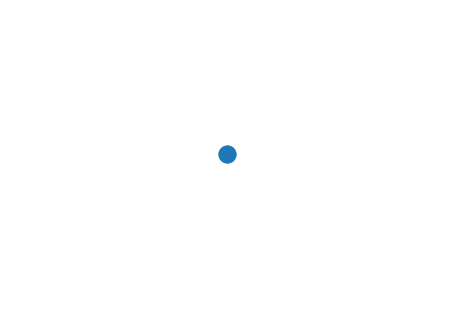

In [37]:
nx.draw(G)

In [38]:
G.add_node('Nodo 2')
G.add_node('Nodo 3')
G.add_node('Nodo 4')
G.add_node('Nodo 5')

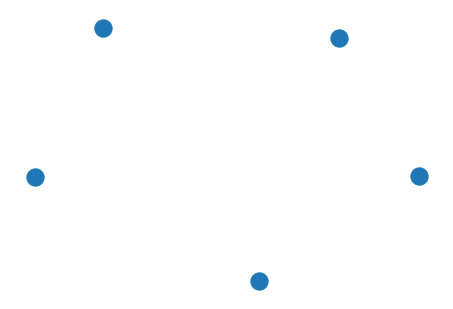

In [39]:
nx.draw(G)

In [40]:
G.add_edge('Nodo 1', 'Nodo 5')
G.add_edge('Nodo 1', 'Nodo 3')
G.add_edge('Nodo 2', 'Nodo 5')
G.add_edge('Nodo 3', 'Nodo 4')
G.add_edge('Nodo 1', 'Nodo 4')

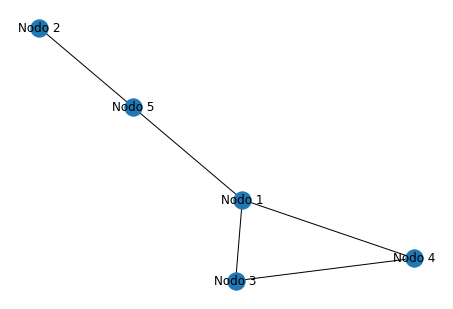

In [41]:
nx.draw(G, with_labels = True )

In [42]:
G.nodes

NodeView(('Nodo 1', 'Nodo 2', 'Nodo 3', 'Nodo 4', 'Nodo 5'))

In [43]:
G.edges

EdgeView([('Nodo 1', 'Nodo 5'), ('Nodo 1', 'Nodo 3'), ('Nodo 1', 'Nodo 4'), ('Nodo 2', 'Nodo 5'), ('Nodo 3', 'Nodo 4')])

In [44]:
G.degree

DegreeView({'Nodo 1': 3, 'Nodo 2': 1, 'Nodo 3': 2, 'Nodo 4': 2, 'Nodo 5': 2})

In [45]:
# Los nodos también pueden denominarse con números:
G1 = nx.Graph()

In [46]:
G1.add_node(0)
G1.add_node(1)
G1.add_node(2)
G1.add_node(3)

In [47]:
G1.nodes

NodeView((0, 1, 2, 3))

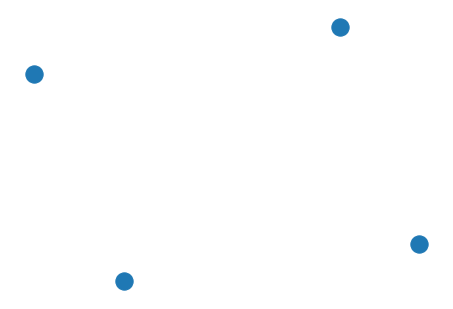

In [48]:
nx.draw(G1)

Red lineal

In [49]:
# Introduccion de for y range... primera estructura de iteración. 

##Y PRIMERA VEZ QUE EXPLICAS QUE SI PONES GATO, PYTHON LO IGNORA

for i in range(10):
    #print(i) # primer ejemplo... DA DIEZ NUMEROS, EMPEZANDO POR CERO. OSEA, LLEGA HASTA EL 9
    #print(i**2) # se pueden hacer todas las operaciones 
    G1.add_node(i)

In [50]:
G1.nodes ## Ojo con por qué aparecen en ese orden...

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [51]:
# ahora agregaremos los enlaces para una red lineal... 
# Pregunta 1:  como le podemos hacer?? 
# Pregunta 2: cuántos enlaces vamos a poner? 9
for i in range(9):
    #print(i, i+1)
    G1.add_edge(i,i+1)

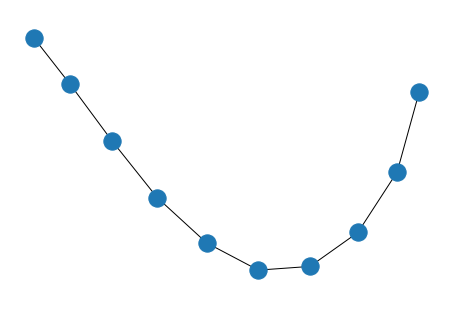

In [52]:
G1.edges
nx.draw(G1)

In [53]:
G1.degree

DegreeView({0: 1, 1: 2, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 1})

In [54]:
#for i in range(10): #secuencia de 10 numeros consecutivos empezando por cero
    print(lista_nodos[i]) # primero imprimir solo para ver que esta pasando
    # hay que elegir una de dos... o juntamos cada uno con el siguiente pero no contamos el último o juntamos cada uno con el anterior, pero sin considerar el primero
for i in range(9):
    #print(i, i+1) # primero imprimir para ver si es lo que buscamos, luego comentamos
    G1.add_edge(i, i+1)

IndentationError: unexpected indent (<ipython-input-54-e17aaf7d490b>, line 2)

In [ ]:
nx.draw(G1)

Anillo o ciclo

In [ ]:
G2 = nx.Graph()

In [ ]:
for i in range(10):
    G2.add_node(i)

In [ ]:
for i in range(9):
    G2.add_edge(i, i+1)

In [ ]:
G2.add_edge(0,9)

In [ ]:
nx.draw(G2, with_labels = True)

Mejora (introducción a las listas)

In [ ]:
#crear una variable, de tipo lista
lista= [7,4,1,8,5,2,9,6,3,0]

In [ ]:
#algunos ejemplos de como se accede a los elementos de una lista... mediante corchetes CONTAR EL CERO
lista[9] #para cada elemento
lista[0:3] #semiabierto, considera el cero, no considera el 3
lista[1:5] #semiabierto, considera el 1, no considera el 5
lista[:5] #sin indicar uno de los extremos
lista[3:]
lista[-1] #indices negativos para contar a partir del último

In [ ]:
G_anillo = nx.Graph()
N = 15

In [ ]:
for i in range(N):
    G_anillo.add_node(i)

In [ ]:
#G_anillo.nodes
#list(G_anillo.nodes)
lista_nodos = list(G_anillo.nodes)
lista_nodos

In [ ]:
lista_nodos[2] #acá está aburrido, porque coinciden... pero lo hacemos para poder hacer lo siguiente:
lista_nodos[-10] #nos da el elemento contando desde el ultimo
lista_nodos[-1] #nos da el ultimo

In [ ]:
lista_nodos ### para tenerla a la vista

In [ ]:
"""ahora con los numeros i haremos referencia a los elementos de la lista_nodos, NO A LOS NODOS...
es decir, i se va a referir no a lo nodo i, sino al i-ésimo elemento de la lista de nodos... veamos"""
for i in range(N):
    #print(lista_nodos[i]) #nada importante
    #print(lista_nodos[-i]) # reflexionar... por qué sí aparece el 0???
    #print(lista_nodos[i+1]) #DETENERTE A EXPLICAR ESTO, QUE ES CLAVE!!!!!!!!!!!!!!!!
    #print(lista_nodos[i-1]) ### QUÉ VA A PASAR???? NO, NO VA A HABER ERROR... POR QUÉ?
    
    #print(lista_nodos[i-1],lista_nodos[i])
    
    G_anillo.add_edge(lista_nodos[i-1], lista_nodos[i])

In [ ]:
nx.draw(G_anillo)

In [ ]:
Anillo = nx.Graph()
N = 20
for i in range(N):
    Anillo.add_node(i)
lista_nodos = list(Anillo.nodes)

for i in range(N):
    Anillo.add_edge(lista_nodos[i-1],lista_nodos[i])

nx.draw(Anillo, with_labels = True)


Red regular a segundos vecinos

Generalizacion de anillo con segundos vecinos

#primero copiar el codigo anterior y luego cambiarle el nombre a la red

In [ ]:
Anillo2 = nx.Graph()
N = 10
for i in range(N):
    Anillo2.add_node(i)
lista_nodos = list(Anillo2.nodes)

for i in range(N):
    Anillo2.add_edge(lista_nodos[i-1],lista_nodos[i])
    Anillo2.add_edge(lista_nodos[i-2],lista_nodos[i])
#    Anillo2.add_edge(lista_nodos[i-3],lista_nodos[i])
#    Anillo2.add_edge(lista_nodos[i-4],lista_nodos[i])

nx.draw(Anillo2)

### 1.2 Matriz de adyacencia
Mediante las matrices de numpy se pueden generar redes en NetworkX.

In [ ]:
#matriz como lista de listas:
#ojo, si tu estructura en python usa comas, puedes cambiar la línea:
lista1 = [0,1,1]
lista2 = [2,1,3]
lista3 = [0,1,2]
[lista1, lista2, lista3]
np.array([lista1, lista2, lista3])
A = np.array([lista1, lista2, lista3])

In [ ]:
B = np.array([lista2, lista1, lista3])

In [ ]:
A.dot(B)

In [ ]:
M = np.array([[0,1,0,0,1,0],
              [1,0,1,0,1,1],
              [0,1,0,1,0,0],
              [0,0,1,0,0,1],
              [1,1,0,0,0,1],
              [0,1,0,1,1,0]])
G2 = nx.from_numpy_matrix(M)

In [ ]:
nx.draw(G2, with_labels = True)

In [ ]:
M.dot(M).dot(M) #nos da el número de caminos de longitud 3

In [ ]:
M3 = np.array([[0,0,0,0,1,0],
              [1,0,0,0,1,1],
              [0,1,0,1,0,0],
              [0,0,0,0,0,1],
              [0,1,0,0,0,1],
              [0,1,0,0,1,0]])
G3 = nx.DiGraph(M3)
nx.draw(G3, with_labels = True)